In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#1. Max concentration in features used for learning
df_properties = pd.read_csv("results/merged_fitted_sigmoid4_123_with_drugs_properties.csv")

df_properties.head()

In [7]:
os.listdir("data")

['Drug_Features2.csv',
 'Cell_Lines_Details.csv',
 'Drug_Features.csv',
 'Cell_Line_Features_PANCAN_simple_MOBEM.xlsx',
 'Cell_Line_Features_PANCAN_simple_MOBEM.tsv',
 'normalised_dose_response_data.csv']

In [30]:
df_profiles = pd.read_csv("data/normalised_dose_response_data.csv")
df_profiles.columns

/Users/Marina/anaconda3/envs/myspark/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (28,30,31,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unnamed: 0', 'CELL_LINE_NAME', 'COSMIC_ID', 'DRUG_ID',
       'DRUGID_COSMICID', 'FOLD_DILUTION', 'MAX_CONC', 'fd_num_0', 'fd_num_1',
       'fd_num_2', 'fd_num_3', 'fd_num_4', 'fd_num_5', 'fd_num_6', 'fd_num_7',
       'fd_num_8', 'fd_num_9', 'norm_cells_0', 'norm_cells_1', 'norm_cells_2',
       'norm_cells_3', 'norm_cells_4', 'norm_cells_5', 'norm_cells_6',
       'norm_cells_7', 'norm_cells_8', 'norm_cells_9', 'per_slope_change_0',
       'per_slope_change_1', 'per_slope_change_2', 'per_slope_change_3',
       'per_slope_change_4', 'per_slope_change_5', 'per_slope_change_6',
       'per_slope_change_7', 'slope_0', 'slope_1', 'slope_2', 'slope_3',
       'slope_4', 'slope_5', 'slope_6', 'slope_7', 'slope_8'],
      dtype='object')

In [31]:
'MAX_CONC' in df_profiles.columns

True

In [32]:
df_profiles.head()

,Unnamed: 0,CELL_LINE_NAME,COSMIC_ID,DRUG_ID,DRUGID_COSMICID,FOLD_DILUTION,MAX_CONC,fd_num_0,fd_num_1,fd_num_2,...,per_slope_change_7,slope_0,slope_1,slope_2,slope_3,slope_4,slope_5,slope_6,slope_7,slope_8
0,0,HDQ-P1,1290922,332,332_1290922,2,10.240,0,0.111111,0.222222,...,-2.14694,0.354085,-0.371905,0.069255,0.450075,-0.049503,-0.131784,0.246947,-1.239447,1.421566
1,1,HDQ-P1,1290922,257,257_1290922,2,10.240,0,0.111111,0.222222,...,-30.3283,-0.275239,0.163481,0.586129,0.180903,-0.221430,-0.349017,0.157822,0.087103,-2.554585
2,2,HDQ-P1,1290922,245,245_1290922,2,40.000,0,0.111111,0.222222,...,-0.618543,-0.394857,-0.615137,0.485215,-0.923687,0.466260,2.837371,-5.409070,-3.468825,-1.323207
3,3,HDQ-P1,1290922,155,155_1290922,2,0.512,0,0.111111,0.222222,...,1.14591,0.791510,-0.964611,1.238764,1.046952,-0.652559,-1.921061,-0.541266,-0.480877,-1.031916
4,4,HDQ-P1,1290922,192,192_1290922,2,16.000,0,0.111111,0.222222,...,1.53355,0.317413,0.044115,-0.604783,0.510820,-0.431190,0.575779,2.380415,-0.793585,-2.010587


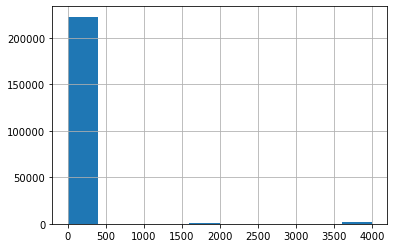

In [33]:
df_profiles['MAX_CONC'].hist();

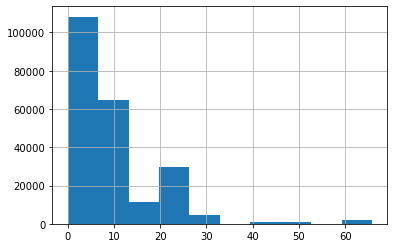

In [34]:
df_profiles[df_profiles['MAX_CONC']<500]['MAX_CONC'].hist();

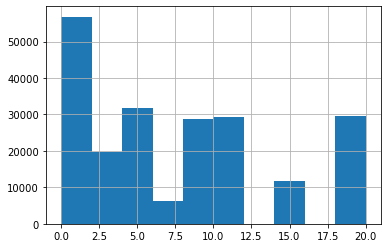

In [35]:
df_profiles[df_profiles['MAX_CONC']<30]['MAX_CONC'].hist();

In [ ]:
#merge the MAX_CONC column
df3 = pd.merge(df_properties, df_profiles[["DRUG_ID", "COSMIC_ID", "MAX_CONC"]], on=["DRUG_ID", "COSMIC_ID"])

df_grouped = df_profiles.groupby(["DRUG_ID", "COSMIC_ID"])[["MAX_CONC"]].count()
df_grouped[df_grouped["MAX_CONC"]>1].shape

In [ ]:
df_grouped = df_profiles.groupby("DRUG_ID")[["MAX_CONC"]].nunique()
print(df_grouped[df_grouped["MAX_CONC"]>1].shape, df_profiles["DRUG_ID"].nunique())
drugs = df_grouped[df_grouped["MAX_CONC"]>1].index
print(drugs)

In [36]:
len(set(df_properties["DRUG_ID"].unique()) &  set(drugs))

df_grouped = df3.groupby(["DRUG_ID", "COSMIC_ID"])[["MAX_CONC"]].count()
df_grouped[df_grouped["MAX_CONC"]>1]

# For which columns do we need scaling/normalisation?

columns_to_normalise = []
for col in df_properties.columns:
    if df_properties[col].nunique()>2:
        columns_to_normalise.append(col)

columns_to_normalise = ['surface_area', 'covalent_unit_count','xlogp',
                        'heavy_atom_count','h_bond_acceptor_count',
                        'molecular_weight','atom_stereo_count','2bonds',
                        'bond_stereo_count','complexity','rotatable_bond_count',
                        'undefined_atom_stereo_count', 'defined_atom_stereo_count']